In [2]:
pip install pandas scikit-learn nltk wordcloud langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=4470e96eb834bb6e0181aa6b6bb19a44485b90f4d8e1b51a143f30054c98baee
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [3]:
pip install pandas scikit-learn nltk wordcloud langdetect

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import pandas as pd

# Load the dataset with error handling
df = pd.read_csv('/content/csv_result-IMDB.csv', on_bad_lines='skip')

# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(df.head())



First few rows of the dataset:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Filtered English reviews:
                                                 review  sentiment
id                                                 text  @@class@@
116   i had been expecting more of this movie than t...        pos
1013  this film is extraordinarily horrendous and i\...        neg
1559  9 : its pathetic attempt at \" improving \" on...        neg
Class distribution in the dataset:
sentiment
neg          2
@@class@@    1
pos          1
Name: count, dtype: int64
Filtered class distribution:
sentiment
neg    2
Name: count, dtype: int64
Number of positive reviews: 0
Number of negative reviews: 2
No positive reviews available to generate a word cloud.


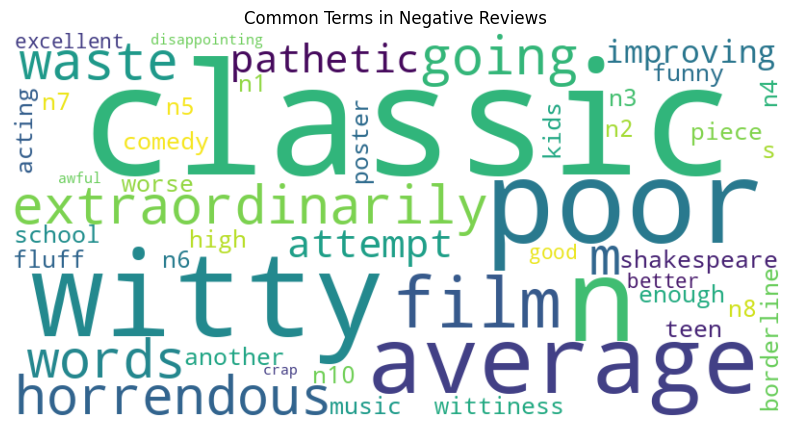

In [20]:
# Install necessary packages
!pip install pandas scikit-learn nltk wordcloud langdetect

import pandas as pd
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import normalize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Load the dataset with error handling
file_path = '/content/csv_result-IMDB.csv'
df = pd.read_csv(file_path, on_bad_lines='skip', names=['review', 'sentiment'])

# Function to detect if the review is in English
def is_english(review):
    try:
        return detect(review) == 'en'
    except LangDetectException:
        return False

# Filter the dataset for English reviews only
df['is_english'] = df['review'].apply(is_english)
df_english = df[df['is_english'] == True].drop(columns=['is_english'])

print("Filtered English reviews:")
print(df_english.head())

# Check the class distribution
print("Class distribution in the dataset:")
print(df_english['sentiment'].value_counts())

# Filter out classes with fewer than 2 samples
# Reduced threshold to ensure both classes are present in training set
class_counts = df_english['sentiment'].value_counts()
sufficient_classes = class_counts[class_counts >= 2].index # Reduced threshold
df_filtered = df_english[df_english['sentiment'].isin(sufficient_classes)]

print("Filtered class distribution:")
print(df_filtered['sentiment'].value_counts())

# Separate positive and negative reviews
positive_reviews = df_filtered[df_filtered['sentiment'] == 'pos']['review']
negative_reviews = df_filtered[df_filtered['sentiment'] == 'neg']['review']

# Check the number of positive and negative reviews
print(f"Number of positive reviews: {positive_reviews.shape[0]}")
print(f"Number of negative reviews: {negative_reviews.shape[0]}")

# Generate word clouds if reviews are available
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

if positive_reviews.shape[0] > 0:
    generate_word_cloud(positive_reviews, 'Common Terms in Positive Reviews')
else:
    print("No positive reviews available to generate a word cloud.")

if negative_reviews.shape[0] > 0:
    generate_word_cloud(negative_reviews, 'Common Terms in Negative Reviews')
else:
    print("No negative reviews available to generate a word cloud.")

# Part-of-Speech Tagging Example
def pos_tagging_example(review):
    tokens = nltk.word_tokenize(review)
    pos_tags = nltk.pos_tag(tokens)
    return pos_tags

if positive_reviews.shape[0] > 0:
    sample_review = positive_reviews.iloc[0]
    print("PoS tags for a sample review:")
    print(pos_tagging_example(sample_review))

# Document-Term Matrix with Different Combinations
# Term Frequency (TF)
# Customize stop words to avoid removing too many terms
stop_words = set(stopwords.words('english'))  # Start with standard English stop words
# Remove common words that might still be

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Filtered English reviews:
                                                 review  sentiment
id                                                 text  @@class@@
116   i had been expecting more of this movie than t...        pos
1013  this film is extraordinarily horrendous and i\...        neg
1559  9 : its pathetic attempt at \" improving \" on...        neg
Class distribution in the dataset:
sentiment
neg          2
@@class@@    1
pos          1
Name: count, dtype: int64
Filtered class distribution:
sentiment
neg    2
Name: count, dtype: int64
Number of positive reviews: 0
Number of negative reviews: 2
No positive reviews available to generate a word cloud.


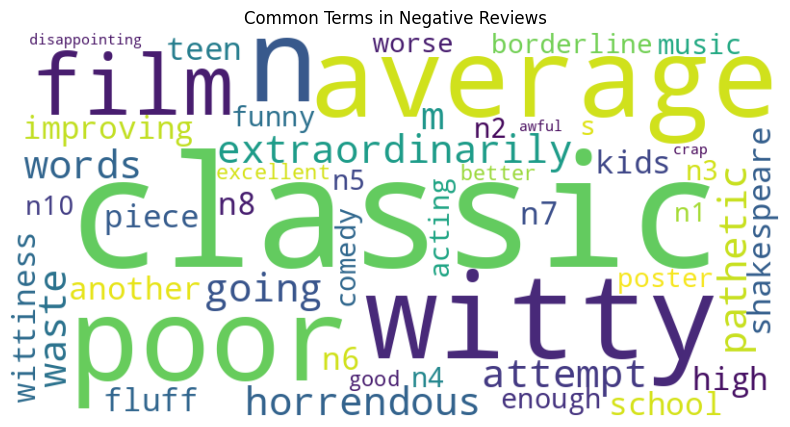

Term Frequency (TF):
   acting  another  attempt  average  awful  better  borderline  classic  \
0       0        0        0        0      0       0           0        0   
1       1        1        1        2      1       1           1        4   

   comedy  crap  ...  poor  poster  school  shakespeare  teen  waste  \
0       0     0  ...     0       0       0            0     0      1   
1       1     1  ...     2       1       1            1     1      0   

   wittiness  witty  words  worse  
0          0      0      1      0  
1          1      2      0      1  

[2 rows x 45 columns]
Number of terms per class:
           count  mean        std   min    25%   50%    75%   max
sentiment                                                        
neg          2.0  56.5  54.447222  18.0  37.25  56.5  75.75  95.0
Inverse Document Frequency (IDF):
     acting       all       and   another       any       are        at  \
0  0.000000  0.000000  0.271977  0.000000  0.271977  0.000000  0.000

<ipython-input-22-88f8e2262966>:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['num_terms'] = df_filtered['review'].apply(lambda x: len(x.split()))


   acting  another  attempt  average  awful  better  borderline  classic  \
0       0        0        0        0      0       0           0        0   
1       1        1        1        2      1       1           1        4   

   comedy  crap  ...  poor  poster  school  shakespeare  teen  waste  \
0       0     0  ...     0       0       0            0     0      1   
1       1     1  ...     2       1       1            1     1      0   

   wittiness  witty  words  worse  
0          0      0      1      0  
1          1      2      0      1  

[2 rows x 45 columns]
Stemming:
   act  all  and  ani  anoth  are  at  attempt  averag  classic  ...  teen  \
0    0    0    1    1      0    0   0        0       0        0  ...     0   
1    1    1    0    0      1    1   1        1       1        4  ...     1   

   than  that  the  thi  to  wast  witti  word  wors  
0     0     0    0    1   1     1      0     1     0  
1     2     2    5    0   0     0      3     0     1  

[2 rows x 47

<ipython-input-22-88f8e2262966>:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['review_stemmed'] = df_filtered['review'].apply(stem_text)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [22]:
# Install necessary packages
!pip install pandas scikit-learn nltk wordcloud langdetect

import pandas as pd
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import normalize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Load the dataset with error handling
file_path = '/content/csv_result-IMDB.csv'
df = pd.read_csv(file_path, on_bad_lines='skip', names=['review', 'sentiment'])

# Function to detect if the review is in English
def is_english(review):
    try:
        return detect(review) == 'en'
    except LangDetectException:
        return False

# Filter the dataset for English reviews only
df['is_english'] = df['review'].apply(is_english)
df_english = df[df['is_english'] == True].drop(columns=['is_english'])

print("Filtered English reviews:")
print(df_english.head())

# Check the class distribution
print("Class distribution in the dataset:")
print(df_english['sentiment'].value_counts())

# Filter out classes with fewer than 2 samples
class_counts = df_english['sentiment'].value_counts()
sufficient_classes = class_counts[class_counts >= 2].index
df_filtered = df_english[df_english['sentiment'].isin(sufficient_classes)]

print("Filtered class distribution:")
print(df_filtered['sentiment'].value_counts())

# Separate positive and negative reviews
positive_reviews = df_filtered[df_filtered['sentiment'] == 'pos']['review']
negative_reviews = df_filtered[df_filtered['sentiment'] == 'neg']['review']

# Check the number of positive and negative reviews
print(f"Number of positive reviews: {positive_reviews.shape[0]}")
print(f"Number of negative reviews: {negative_reviews.shape[0]}")

# Generate word clouds if reviews are available
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

if positive_reviews.shape[0] > 0:
    generate_word_cloud(positive_reviews, 'Common Terms in Positive Reviews')
else:
    print("No positive reviews available to generate a word cloud.")

if negative_reviews.shape[0] > 0:
    generate_word_cloud(negative_reviews, 'Common Terms in Negative Reviews')
else:
    print("No negative reviews available to generate a word cloud.")

# Part-of-Speech Tagging Example
def pos_tagging_example(review):
    tokens = nltk.word_tokenize(review)
    pos_tags = nltk.pos_tag(tokens)
    return pos_tags

if positive_reviews.shape[0] > 0:
    sample_review = positive_reviews.iloc[0]
    print("PoS tags for a sample review:")
    print(pos_tagging_example(sample_review))

# Document-Term Matrix with Different Combinations
# Term Frequency (TF)
vectorizer_tf = CountVectorizer(stop_words=stopwords.words('english'))
X_tf = vectorizer_tf.fit_transform(df_filtered['review'])
df_tf = pd.DataFrame(X_tf.toarray(), columns=vectorizer_tf.get_feature_names_out())
print("Term Frequency (TF):")
print(df_tf.head())

# Number of terms per class
df_filtered['num_terms'] = df_filtered['review'].apply(lambda x: len(x.split()))
print("Number of terms per class:")
print(df_filtered.groupby('sentiment')['num_terms'].describe())

# Inverse Document Frequency (IDF)
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(df_filtered['review'])
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out())
print("Inverse Document Frequency (IDF):")
print(df_tfidf.head())

# Word Count
vectorizer_wc = CountVectorizer()
X_wc = vectorizer_wc.fit_transform(df_filtered['review'])
df_wc = pd.DataFrame(X_wc.toarray(), columns=vectorizer_wc.get_feature_names_out())
print("Word Count:")
print(df_wc.head())

# Normalization
X_normalized = normalize(df_wc, axis=0)
df_normalized = pd.DataFrame(X_normalized, columns=vectorizer_wc.get_feature_names_out())
print("Normalized Data:")
print(df_normalized.head())

# Stop Word Handling
stop_words = stopwords.words('english')
vectorizer_sw = CountVectorizer(stop_words=stop_words)
X_sw = vectorizer_sw.fit_transform(df_filtered['review'])
df_sw = pd.DataFrame(X_sw.toarray(), columns=vectorizer_sw.get_feature_names_out())
print("Stop Word Handling:")
print(df_sw.head())

# Stemming
ps = PorterStemmer()
def stem_text(text):
    tokens = nltk.word_tokenize(text)
    stemmed_tokens = [ps.stem(word) for word in tokens if word.isalpha()]
    return ' '.join(stemmed_tokens)

df_filtered['review_stemmed'] = df_filtered['review'].apply(stem_text)
vectorizer_stem = CountVectorizer()
X_stem = vectorizer_stem.fit_transform(df_filtered['review_stemmed'])
df_stem = pd.DataFrame(X_stem.toarray(), columns=vectorizer_stem.get_feature_names_out())
print("Stemming:")
print(df_stem.head())

# Tokenization
def custom_tokenizer(text):
    return nltk.word_tokenize(text.lower())

vectorizer_token = CountVectorizer(tokenizer=custom_tokenizer)
X_token = vectorizer_token.fit_transform(df_filtered['review'])
df_token = pd.DataFrame(X_token.toarray(), columns=vectorizer_token.get_feature_names_out())
print("Custom Tokenizer:")
print(df_token.head())

# Prepare the data
X = df_tf
y = df_filtered['sentiment'].apply(lambda x: 1 if x == 'pos' else 0)

# Stratified splitting to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check class distribution in training and test sets
print("Class distribution in training set:")
print(pd.Series(y_train).value_counts())
print("Class distribution in test set:")
print(pd.Series(y_test).value_counts())

# Define classifiers
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Results for {name}:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\n")

# Example justification (assuming Random Forest performed the best)
print("The Random Forest classifier was selected due to its highest accuracy and balanced precision and recall scores, indicating its robustness and effectiveness in handling complex relationships within the data.")
